In [27]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import sys
import copy

class Graph:
    
    def __init__(self, num_nodes, num_edges=None):
        self.num_nodes = num_nodes
        self.num_edges = num_edges
        
        self.adj_list = [[] for _ in range(num_nodes+1)]
        self.adj_matrix = [[0 for _ in range(num_nodes+1)] for _ in range(num_nodes+1)]
        
        self.adj_matrix_index_modified = False
        self.adj_list_index_modified = False

        
    def make_graph_unweighted(self):
        for _ in range(self.num_edges):
            x, y = map(int, input().split())
            
            # Scanning adjaceny list
            self.adj_list[x].append(y)
            self.adj_list[y].append(x)
            
            #Scanning adjaceny matrix
            self.adj_matrix[x][y] = 1
            self.adj_matrix[y][x] = 1
        
        # Uncomment the next lines, if you want to remove the starting element from adjaceny list.
        # adj_list.pop(0)
        # self.adj_list_modified = True
        
        # Uncomment the next lines, if you want to remove the starting element from adjaceny matrix.
        # self.adj_matrix = np.delete(self.adj_matrix, 0, 0)
        # self.adj_matrix = np.delete(self.adj_matrix, 0, 1)
        # self.adj_matrix_modified = True
    
        
    def make_graph_weighted(self, graph=None, index_modified = True):
        self.adj_matrix_index_modified = index_modified
        if graph != None:
            self.adj_matrix = graph
        
        for i in range(num_nodes):
            for j in range(num_nodes):
                if self.adj_matrix[i][j] > 0:
                    self.adj_list[i].append((j, self.adj_matrix[i][j]))
            
    def bfs(self, start):
        self.level = [0 for _ in range(num_nodes)]
        visited = [False for _ in range(num_nodes)]
        visited[start] = True
        stack = [start]
        while(len(stack) != 0):
            node = stack.pop(0)
            
            if func != None:
                pass
#                do something...
            
            for i in self.adj_list[node]:
                if visited[i[0]]:
                    continue
                self.level[i[0]] = self.level[node] + 1
                stack.append(i[0])
                visited[i[0]] = True
                
                    
    def dfs(self, start, dfs_type = 0, func = None):
        visited = [False for _ in range(num_nodes)]
        
        if dfs_type == 0:
            out = self.dfs_recursive(start, visited, func)
        else:
            out = self.dfs_iterative(start, visited, func)
        
        return out
    
    def dfs_recursive(self, node, visited, func):
        if func != None:
            pass
#             do something...
            
        visited[node] = True
        for i in self.adj_list[node]:
            if visited[i[0]]:
                continue
            self.dfs_recursive(i[0], visited, func)
        
    def dfs_iterative(self, node, visited, func):
        visited = [False for _ in range(num_nodes)]
        visited[node] = True
        stack = [node]
        loop = False
        while(len(stack) != 0):
            node = stack.pop(-1)
            
            if func != None:
                # Some functionality given...
                if loop:
                    return True
            
            for i in self.adj_list[node]:
                if visited[i[0]]:
                    continue
                stack.append(i[0])
                visited[i[0]] = True
        
    def find_minimum_cost_dijkstra(self, node_relaxed, distance, num_nodes):
        min_cost_node_index = None
        min_distance = sys.maxsize
        
        for n in range(num_nodes):
            if distance[n] < min_distance and node_relaxed[n] == False:
                min_distance = distance[n]
                min_cost_node_index = n
 
        return min_cost_node_index
        
    
    def dijkstra(self, start_node):
        graph = copy.deepcopy(self.adj_matrix)
        num_nodes = self.num_nodes
        
        if self.adj_matrix_index_modified == False:
            graph = np.delete(graph, 0, 0)
            graph = np.delete(graph, 0, 1)
            num_nodes -= 1
        
        node_relaxed = [False for _ in range(num_nodes)]
        distance_from_start = [sys.maxsize]*(num_nodes)
        distance_from_start[start_node] = 0
        
        for _ in range(num_nodes):
            next_node = self.find_minimum_cost_dijkstra(node_relaxed, distance_from_start, num_nodes)
            node_relaxed[next_node] = True
            
            for vertex in range(num_nodes):
                if graph[next_node][vertex] > 0 and node_relaxed[vertex] == False:
                    if distance_from_start[vertex] > distance_from_start[next_node] + graph[next_node][vertex]:
                    
                        distance_from_start[vertex] = distance_from_start[next_node] + graph[next_node][vertex]
         
        print("Vertex \tDistance from Source")
        for node in range(num_nodes): 
            print(node+1, "\t", distance_from_start[node])
            
        
    def hamiltonian_cycle(self, k = 1, x = [1]+[0 for i in range(self.num_nodes-2)]):
        while(True):
            x[k] = hamiltonian_cycle_util(k, x)
            if x[k] == 0:
                return
            
            if k == self.num_nodes-1:
                print(x)
            else:
                hamiltonian_cycle(k+1, x)
                
            
    def hamiltonian_cycle_util(self, k, x):
        while(True):
            x[k] = x[k+1]%(n+1)
            if x[k] == 0:
                return
            
            if self.matrix[x[k-1]][x[k]] != 0:
                for j in range(0, k):
                    if x[j] == x[k]:
                        break
                    
                        
            
            
    
#     def minimum_spanning_tree_kruskal():
#         spanning_tree_edges = []
#         sorted_edges_weights = []
#         for i in range(self.num_nodes):
#             for j in range(self.num_nodes):
#                 if adj_matrix[i][j] != 0:
#                     sorted_edges_weights.append((i, j, adj_matrix[i][j]))
#         sorted_edges_weights = sorted(sorted_edges_weights,key=lambda item: item[2])
        
#         itr = 0
#         while(len(spanning_tree_edges) < self.num_nodes):
#             if 
#             spanning_tree_edges.append(sorted_edges_weight[itr])
        
        
    def show(self):
        temp = np.array(self.adj_matrix)
        if self.adj_matrix_index_modified == False:
            temp = np.delete(temp, 0, 0)
            temp = np.delete(temp, 0, 1)
        
        G = nx.from_numpy_matrix(temp)
        nx.draw(G, with_labels= False)


In [3]:
nodes = 9
edges = 0
g1 = Graph(9, edges)
g1.make_graph_weighted(graph = [[0, 4, 0, 0, 0, 0, 0, 8, 0], 
                                [4, 0, 8, 0, 0, 0, 0, 11, 0], 
                                [0, 8, 0, 7, 0, 4, 0, 0, 2], 
                                [0, 0, 7, 0, 9, 14, 0, 0, 0], 
                                [0, 0, 0, 9, 0, 10, 0, 0, 0], 
                                [0, 0, 4, 14, 10, 0, 2, 0, 0], 
                                [0, 0, 0, 0, 0, 2, 0, 1, 6], 
                                [8, 11, 0, 0, 0, 0, 1, 0, 7], 
                                [0, 0, 2, 0, 0, 0, 6, 7, 0]
                               ])

NameError: name 'num_nodes' is not defined

In [9]:
g2 = Graph(num_nodes = 5, num_edges = 7)
g2.make_graph_unweighted()

1 2
1 5
2 3
2 4
2 5
4 3
5 4


In [23]:
g2.adj_list[1]

[(2, 1), (5, 1)]

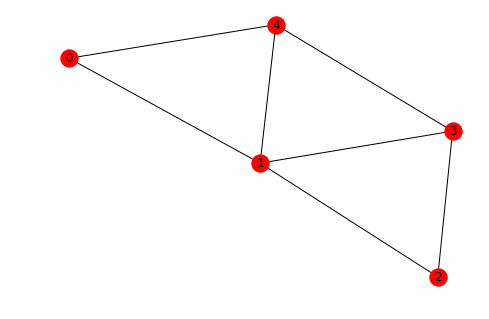

In [28]:
g2.show()

In [36]:
g2.adj_matrix[1][5]

1

In [33]:
def abc(a = [5] + [i for i in range(5)]):
    print(a)

In [35]:
abc()

[5, 0, 1, 2, 3, 4]
